## Dataset
https://www.kaggle.com/datasets/yasserh/imdb-movie-ratings-sentiment-analysis

## References
https://aclanthology.org/C14-1008.pdf
https://www.bioinf.jku.at/publications/older/2604.pdf



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
shuffle = False
import pandas as pd
from sklearn.model_selection import train_test_split


dataset = pd.read_csv('/content/drive/MyDrive/datasets/movie.csv', sep=",")
X = dataset["text"]
y = dataset["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, shuffle=shuffle)

X_train, y_train

(0       I grew up (b. 1965) watching and loving the Th...
 1       When I put this movie in my DVD player, and sa...
 2       Why do people who do not know what a particula...
 3       Even though I have great interest in Biblical ...
 4       Im a die hard Dads Army fan and nothing will e...
                               ...                        
 7995    *May contain spoilers*<br /><br />I bent over ...
 7996    Be very afraid of anyone who likes this film. ...
 7997    Can they possibly get any worse than this? Pro...
 7998    I give it a 2, because of the beautiful Medite...
 7999    I'm not a fan of Adam Sandler. In fact, I don'...
 Name: text, Length: 8000, dtype: object, 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 7995    0
 7996    0
 7997    0
 7998    0
 7999    1
 Name: label, Length: 8000, dtype: int64)

## Approach 1 - RRN

In [5]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.8.0
2.8.0


In [ ]:
from keras.models import Sequential
from keras.callbacks import History, EarlyStopping
from keras.layers import Embedding, TextVectorization, Dense, LSTM, Input

vectorize_layer = TextVectorization(max_tokens=50000)
vectorize_layer.adapt(X_train)

history_Adam = History()

model = Sequential()

# Vectorization
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)

# Embedding
model.add(Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=32))

model.add(LSTM(32, activation='softsign'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()


Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_57 (Text  (None, None)             0         
 Vectorization)                                                  
                                                                 
 embedding_42 (Embedding)    (None, None, 32)          1451232   
                                                                 
 lstm_11 (LSTM)              (None, 32)                8320      
                                                                 
 dense_57 (Dense)            (None, 16)                528       
                                                                 
 dense_58 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,460,097
Trainable params: 1,460,097
Non-trainable params: 0
___________________________________________

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[history_Adam])

Epoch 1/20
125/125 [==============================] - 67s 532ms/step - loss: 0.6929 - accuracy: 0.5155 - val_loss: 0.6938 - val_accuracy: 0.4988
Epoch 2/20
125/125 [==============================] - 64s 514ms/step - loss: 0.6929 - accuracy: 0.5155 - val_loss: 0.6940 - val_accuracy: 0.4988
Epoch 3/20
125/125 [==============================] - 68s 544ms/step - loss: 0.6927 - accuracy: 0.5238 - val_loss: 0.6935 - val_accuracy: 0.5020
Epoch 4/20
125/125 [==============================] - 70s 565ms/step - loss: 0.6921 - accuracy: 0.5278 - val_loss: 0.6933 - val_accuracy: 0.5025
Epoch 5/20
125/125 [==============================] - 69s 554ms/step - loss: 0.7162 - accuracy: 0.5175 - val_loss: 0.6949 - val_accuracy: 0.4988
Epoch 6/20
125/125 [==============================] - 63s 508ms/step - loss: 0.6914 - accuracy: 0.5225 - val_loss: 0.6942 - val_accuracy: 0.5009
Epoch 7/20
125/125 [==============================] - 69s 553ms/step - loss: 0.6897 - accuracy: 0.5297 - val_loss: 0.6933 - val_ac

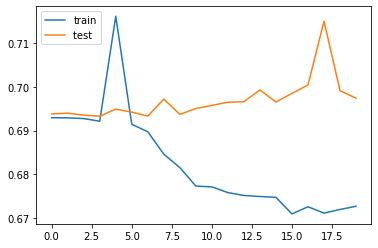

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_Adam.history['loss'], label = "train")
plt.plot(history_Adam.history['val_loss'], label = "test ")



plt.legend()
plt.show()

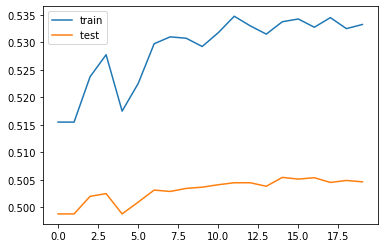

In [ ]:
plt.plot(history_Adam.history['accuracy'], label = "train")
plt.plot(history_Adam.history['val_accuracy'], label = "test ")

plt.legend()
plt.show()


## Approach 2 - Bidirectional


In [ ]:
from keras.models import Sequential
from keras.callbacks import History, EarlyStopping
from keras.layers import Embedding, TextVectorization, Dense, LSTM, Input

vectorize_layer = TextVectorization(max_tokens=50000)
vectorize_layer.adapt(X_train)

history_Adam = History()

model = Sequential()

# Vectorization
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)

# Embedding
model.add(Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=64))

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()


Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_58 (Text  (None, None)             0         
 Vectorization)                                                  
                                                                 
 embedding_43 (Embedding)    (None, None, 64)          2902464   
                                                                 
 dense_59 (Dense)            (None, None, 128)         8320      
                                                                 
 dense_60 (Dense)            (None, None, 64)          8256      
                                                                 
 dense_61 (Dense)            (None, None, 16)          1040      
                                                                 
 dense_62 (Dense)            (None, None, 1)           17        
                                                     

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[history_Adam])

Epoch 1/20
125/125 [==============================] - 22s 175ms/step - loss: 0.6927 - accuracy: 0.5153 - val_loss: 0.6920 - val_accuracy: 0.5129
Epoch 2/20
125/125 [==============================] - 21s 168ms/step - loss: 0.6897 - accuracy: 0.5252 - val_loss: 0.6907 - val_accuracy: 0.5138
Epoch 3/20
125/125 [==============================] - 21s 169ms/step - loss: 0.6860 - accuracy: 0.5357 - val_loss: 0.6924 - val_accuracy: 0.5149
Epoch 4/20
125/125 [==============================] - 22s 177ms/step - loss: 0.6830 - accuracy: 0.5377 - val_loss: 0.6939 - val_accuracy: 0.5147
Epoch 5/20
125/125 [==============================] - 24s 196ms/step - loss: 0.6814 - accuracy: 0.5378 - val_loss: 0.6943 - val_accuracy: 0.5141
Epoch 6/20
125/125 [==============================] - 24s 196ms/step - loss: 0.6795 - accuracy: 0.5387 - val_loss: 0.6967 - val_accuracy: 0.5143
Epoch 7/20
125/125 [==============================] - 23s 188ms/step - loss: 0.6792 - accuracy: 0.5387 - val_loss: 0.6976 - val_ac

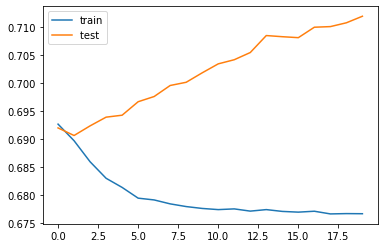

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_Adam.history['loss'], label = "train")
plt.plot(history_Adam.history['val_loss'], label = "test ")



plt.legend()
plt.show()

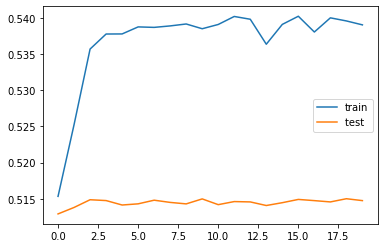

In [ ]:
plt.plot(history_Adam.history['accuracy'], label = "train")
plt.plot(history_Adam.history['val_accuracy'], label = "test ")

plt.legend()
plt.show()


## Approach 3 - GRU

In [ ]:
from keras.models import Sequential
from keras.callbacks import History, EarlyStopping
from keras.layers import Embedding, TextVectorization, Dense, LSTM, Input, Bidirectional

vectorize_layer = TextVectorization(max_tokens=50000)
vectorize_layer.adapt(X_train)

history_Adam = History()

model = Sequential()

# Vectorization
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)

# Embedding
model.add(Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=64))


model.add(Bidirectional(tf.keras.layers.GRU(32)))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.summary()


Model: "sequential_59"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_59 (Text  (None, None)             0         
 Vectorization)                                                  
                                                                 
 embedding_44 (Embedding)    (None, None, 64)          2902464   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               18816     
 l)                                                              
                                                                 
 dense_63 (Dense)            (None, 24)                1560      
                                                                 
 dense_64 (Dense)            (None, 1)                 25        
                                                                 
Total params: 2,922,865
Trainable params: 2,922,865
N

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

# early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[history_Adam])

Epoch 1/20
125/125 [==============================] - 97s 755ms/step - loss: 0.6880 - accuracy: 0.5472 - val_loss: 0.6569 - val_accuracy: 0.6255
Epoch 2/20
125/125 [==============================] - 102s 821ms/step - loss: 0.4633 - accuracy: 0.7945 - val_loss: 0.5537 - val_accuracy: 0.7167
Epoch 3/20
125/125 [==============================] - 102s 820ms/step - loss: 0.1556 - accuracy: 0.9457 - val_loss: 0.6116 - val_accuracy: 0.7722
Epoch 4/20
125/125 [==============================] - 100s 801ms/step - loss: 0.0340 - accuracy: 0.9910 - val_loss: 0.7462 - val_accuracy: 0.7715
Epoch 5/20
125/125 [==============================] - 103s 829ms/step - loss: 0.0084 - accuracy: 0.9985 - val_loss: 0.9285 - val_accuracy: 0.7814
Epoch 6/20
125/125 [==============================] - 95s 760ms/step - loss: 0.0084 - accuracy: 0.9975 - val_loss: 1.0466 - val_accuracy: 0.7831
Epoch 7/20
125/125 [==============================] - 95s 761ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.1557 - va

In [ ]:
model.evaluate(X_test,y_test)

1125/1125 [==============================] - 63s 56ms/step - loss: 1.5798 - accuracy: 0.7926


[1.5797935724258423, 0.792638897895813]

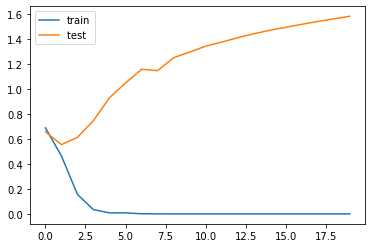

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_Adam.history['loss'], label = "train")
plt.plot(history_Adam.history['val_loss'], label = "test ")



plt.legend()
plt.show()

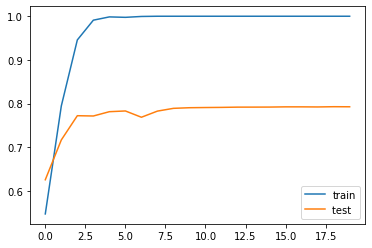

In [ ]:
plt.plot(history_Adam.history['accuracy'], label = "train")
plt.plot(history_Adam.history['val_accuracy'], label = "test ")

plt.legend()
plt.show()


In [1]:
# Approach 4 - TwoLayer - GRU
# https://www.dialog-21.ru/media/3380/arkhipenkoetal.pdf

In [19]:
from keras.models import Sequential
from keras.callbacks import History, EarlyStopping
from keras.layers import Embedding, TextVectorization, Dense, LSTM, Input, Bidirectional, GRU

vectorize_layer = TextVectorization(max_tokens=50000)
vectorize_layer.adapt(X_train)

history_Adam = History()

model = Sequential()

# Vectorization
model.add(Input(shape=(1,), dtype=tf.string))
model.add(vectorize_layer)

# Embedding
model.add(Embedding(input_dim=len(vectorize_layer.get_vocabulary()), output_dim=64))


model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Bidirectional(GRU(64)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_12 (Text  (None, None)             0         
 Vectorization)                                                  
                                                                 
 embedding_12 (Embedding)    (None, None, 64)          3200000   
                                                                 
 bidirectional_18 (Bidirecti  (None, None, 256)        148992    
 onal)                                                           
                                                                 
 bidirectional_19 (Bidirecti  (None, 128)              123648    
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 32)                4128      
                                                     

In [20]:
model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', verbose=1)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, callbacks=[early_stopping, history_Adam])

Epoch 1/30
250/250 [==============================] - 78s 287ms/step - loss: 0.6120 - accuracy: 0.6430 - val_loss: 0.4436 - val_accuracy: 0.8056
Epoch 2/30
250/250 [==============================] - 68s 272ms/step - loss: 0.3167 - accuracy: 0.8736 - val_loss: 0.5175 - val_accuracy: 0.7881
Epoch 3/30
250/250 [==============================] - 68s 272ms/step - loss: 0.1610 - accuracy: 0.9444 - val_loss: 0.5124 - val_accuracy: 0.8043
Epoch 4/30
250/250 [==============================] - 68s 271ms/step - loss: 0.0571 - accuracy: 0.9821 - val_loss: 0.7332 - val_accuracy: 0.8062
Epoch 4: early stopping


In [21]:
model.evaluate(X_test,y_test)

1000/1000 [==============================] - 45s 45ms/step - loss: 0.7332 - accuracy: 0.8062


[0.7331868410110474, 0.8062187433242798]

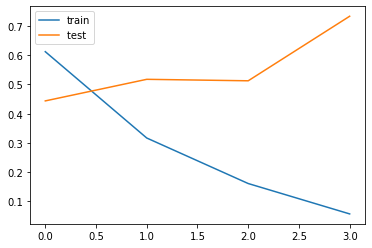

In [22]:
import matplotlib.pyplot as plt

plt.plot(history_Adam.history['loss'], label = "train")
plt.plot(history_Adam.history['val_loss'], label = "test ")



plt.legend()
plt.show()

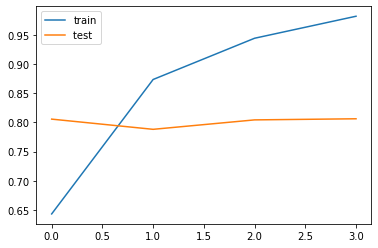

In [23]:
plt.plot(history_Adam.history['accuracy'], label = "train")
plt.plot(history_Adam.history['val_accuracy'], label = "test ")

plt.legend()
plt.show()


In [25]:
!ls

drive  sample_data
